In [1]:
import os

In [2]:
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')
    print(os.getcwd())

/scratch/iav225/ccm/project/DQN-Atari-Transfer-Learning


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import yaml

In [4]:
style.use('seaborn-poster')

In [5]:
name = 'adam_batchnorm_kaiming-01'

In [6]:
def parse_logs(name):
    file = os.path.join('logs', name, 'train.log')
    with open(file, 'r') as f:
        logs = f.read()
    episodes = []
    epsilon = []
    network_updates = []
    mean_rewards = []
    mean_lengths = []
    validation_discounted_rewards = []
    validation_total_rewards = []
    for line in logs.split('\n')[:-1]:
        datum = line.split(', ')
        episode = int(datum[0].split(':')[1])
        eps = float(datum[1].split(':')[1])
        nu = int(datum[2].split(':')[1])
        emr = float(datum[3].split(':')[1])
        eml = float(datum[4].split(':')[1])
        vdr = float(datum[5].split(':')[1])
        vtr = float(datum[6].split(':')[1])
        episodes.append(episode)
        epsilon.append(eps)
        network_updates.append(nu)
        mean_rewards.append(emr)
        mean_lengths.append(eml)
        validation_discounted_rewards.append(vdr)
        validation_total_rewards.append(vtr)
        
    return episodes, epsilon, network_updates, mean_rewards, mean_lengths, validation_discounted_rewards, validation_total_rewards

In [7]:
episodes, epsilon, network_updates, mean_rewards, mean_lengths, validation_discounted_rewards, validation_total_rewards = parse_logs(name)

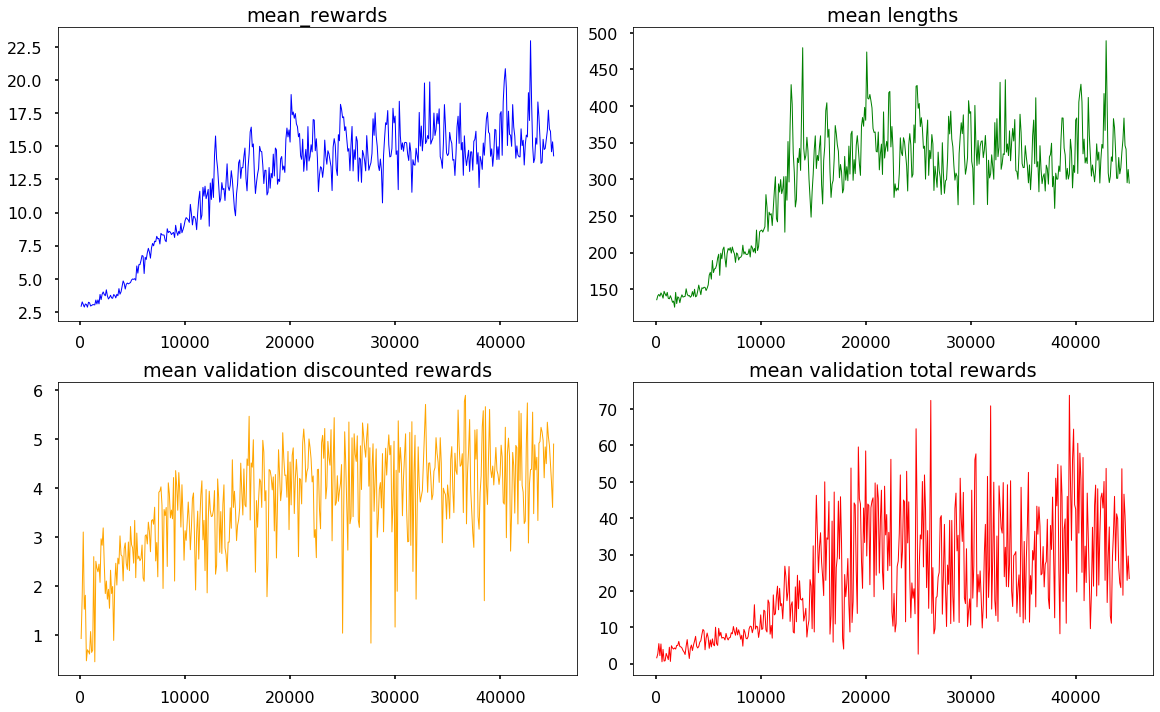

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))
ax[0][0].plot(episodes, mean_rewards, color='blue', lw=1)
ax[0][0].set_title('mean_rewards')
ax[0][1].plot(episodes, mean_lengths, color='green', lw=1)
ax[0][1].set_title('mean lengths')
ax[1][0].plot(episodes, validation_discounted_rewards, color='orange', lw=1)
ax[1][0].set_title('mean validation discounted rewards')
ax[1][1].plot(episodes, validation_total_rewards, color='red', lw=1)
ax[1][1].set_title('mean validation total rewards')
plt.tight_layout()
fig.savefig('metrics.png', bbox_inches='tight')
plt.show()